In [2]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [137]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1000000}'

## EDA 

In [74]:
df = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data_with_Geography-0731.csv")
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,AL,1.00,ST. CLAIR,"26,147.00",NaN,NaN,NaN,NaN,nan,nan,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
1,2020-05,AR,5.00,GREENE,"5,055.00",0 - 17 years,NaN,NaN,NaN,0.00,0.00,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,Yes
2,2020-11,OH,39.00,HENRY,"39,069.00",0 - 17 years,NaN,NaN,NaN,nan,0.00,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,Yes
3,2020-11,KY,21.00,MUHLENBERG,"21,177.00",18 to 49 years,NaN,NaN,NaN,nan,nan,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
4,2020-05,NY,36.00,YATES,"36,123.00",50 to 64 years,NaN,NaN,NaN,0.00,nan,Missing,Missing,Probable Case,Missing,Missing,Missing,NaN,NaN


In [ ]:
#df.tail()

In [7]:
df_na = df[ df.isna().any(axis=1)]

In [8]:
df_not_null = df[ ~ df.isna().any(axis=1)]

In [10]:
df_na.to_csv('covid-cases-na.csv',index= False)

In [11]:
df_not_null.to_csv('covid-cases-not-null.csv',index= False)

In [12]:
df.shape

(27185885, 19)

In [14]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [15]:
#df.isnull().sum() (or) df.isna().sum()
df.isna().sum()

case_month                                0
res_state                              1137
state_fips_code                        1137
res_county                          1524278
county_fips_code                    1524278
age_group                            325273
sex                                  848955
race                                4763444
ethnicity                           5688796
case_positive_specimen_interval    19697046
case_onset_interval                14718568
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                            1334284
underlying_conditions_yn           25386626
dtype: int64

In [17]:
np.count_nonzero(df.isnull().values)   

75813822

In [18]:
df.nunique()

case_month                           19
res_state                            54
state_fips_code                      54
res_county                         1029
county_fips_code                   1524
age_group                             5
sex                                   5
race                                  8
ethnicity                             4
case_positive_specimen_interval     126
case_onset_interval                 109
process                              12
exposure_yn                           3
current_status                        2
symptom_status                        4
hosp_yn                               4
icu_yn                                4
death_yn                              4
underlying_conditions_yn              2
dtype: int64

`case_positive_specimen_interval and case_onset_interval columns are having high number of null values (19.7M and 14.7M respectively). Hence removed the columns.`

In [75]:
# case_positive_specimen_interval and case_onset_interval columns are having high number of null values (19.7M and 14.7M respectively). Hence removed the columns. 
df = df.drop('case_positive_specimen_interval',axis=1)
df = df.drop('case_onset_interval',axis=1)

In [21]:
print('res_state')
print(df['res_state'].unique())
print('age_group')
print(df['age_group'].unique())
print('sex')
print(df['sex'].unique())
print('race')
print(df['race'].unique())
print('ethnicity')
print(df['ethnicity'].unique())
print('process')
print(df['process'].unique())
print('exposure_yn')
print(df['exposure_yn'].unique())
print('hosp_yn')
print(df['hosp_yn'].unique())
print('icu_yn')
print(df['icu_yn'].unique())
print('death_yn')
print(df['death_yn'].unique())
print('underlying_conditions_yn')
print(df['underlying_conditions_yn'].unique())
print('current_status')
print(df['current_status'].unique())
print('symptom_status')
print(df['symptom_status'].unique())

res_state
['AL' 'AR' 'OH' 'KY' 'NY' 'GA' 'NC' 'NH' 'WI' 'IL' 'PA' 'OK' 'UT' 'FL'
 'MN' 'IN' 'VA' 'WV' 'TN' 'IA' 'OR' 'LA' 'TX' 'ND' 'SC' 'MI' 'CO' 'CA'
 'NV' 'NE' 'WA' 'MO' 'NM' 'RI' 'ID' 'KS' 'ME' 'SD' 'MD' 'MS' 'AZ' 'NJ'
 'VT' 'MA' 'AK' 'CT' 'MT' 'HI' 'DE' 'GU' 'VI' nan 'PR' 'DC' 'WY']
age_group
[nan '0 - 17 years' '18 to 49 years' '50 to 64 years' 'Missing'
 '65+ years']
sex
[nan 'Female' 'Male' 'Missing' 'Unknown' 'Other']
race
[nan 'Missing' 'Unknown' 'Black' 'Multiple/Other' 'White'
 'American Indian/Alaska Native' 'Asian'
 'Native Hawaiian/Other Pacific Islander']
ethnicity
[nan 'Missing' 'Hispanic/Latino' 'Non-Hispanic/Latino' 'Unknown']
process
['Missing' 'Clinical evaluation' 'Contact tracing of case patient'
 'Other detection method (specify)' 'Unknown' 'Other'
 'Routine surveillance' 'Laboratory reported' 'Multiple'
 'Provider reported' 'Autopsy' 'Routine physical examination']
exposure_yn
['Missing' 'Unknown' 'Yes']
hosp_yn
['Missing' 'No' 'Unknown' 'Yes']
icu_yn
['Missing

` columns res_county,res_state,age_group,sex,race,ethnicity,underlying_conditions_yn,death_yn have NaN . these are columns mapped to Missing as values not present `

In [76]:
#columns res_county,res_state,age_group,sex,race,ethnicity,underlying_conditions_yn,death_yn have NaN . these are columns mapped to Missing as values not present
for col in ('res_county','res_state','age_group','sex','race','ethnicity','underlying_conditions_yn','death_yn'):
    print(col)
    df[col].fillna(value='Missing', inplace=True)

res_county
res_state
age_group
sex
race
ethnicity
underlying_conditions_yn
death_yn


In [23]:
print('res_state')
print(df['res_state'].unique())
print('age_group')
print(df['age_group'].unique())
print('sex')
print(df['sex'].unique())
print('race')
print(df['race'].unique())
print('ethnicity')
print(df['ethnicity'].unique())
print('process')
print(df['process'].unique())
print('exposure_yn')
print(df['exposure_yn'].unique())
print('hosp_yn')
print(df['hosp_yn'].unique())
print('icu_yn')
print(df['icu_yn'].unique())
print('death_yn')
print(df['death_yn'].unique())
print('underlying_conditions_yn')
print(df['underlying_conditions_yn'].unique())
print('current_status')
print(df['current_status'].unique())
print('symptom_status')
print(df['symptom_status'].unique())

res_state
['AL' 'AR' 'OH' 'KY' 'NY' 'GA' 'NC' 'NH' 'WI' 'IL' 'PA' 'OK' 'UT' 'FL'
 'MN' 'IN' 'VA' 'WV' 'TN' 'IA' 'OR' 'LA' 'TX' 'ND' 'SC' 'MI' 'CO' 'CA'
 'NV' 'NE' 'WA' 'MO' 'NM' 'RI' 'ID' 'KS' 'ME' 'SD' 'MD' 'MS' 'AZ' 'NJ'
 'VT' 'MA' 'AK' 'CT' 'MT' 'HI' 'DE' 'GU' 'VI' 'Missing' 'PR' 'DC' 'WY']
age_group
['Missing' '0 - 17 years' '18 to 49 years' '50 to 64 years' '65+ years']
sex
['Missing' 'Female' 'Male' 'Unknown' 'Other']
race
['Missing' 'Unknown' 'Black' 'Multiple/Other' 'White'
 'American Indian/Alaska Native' 'Asian'
 'Native Hawaiian/Other Pacific Islander']
ethnicity
['Missing' 'Hispanic/Latino' 'Non-Hispanic/Latino' 'Unknown']
process
['Missing' 'Clinical evaluation' 'Contact tracing of case patient'
 'Other detection method (specify)' 'Unknown' 'Other'
 'Routine surveillance' 'Laboratory reported' 'Multiple'
 'Provider reported' 'Autopsy' 'Routine physical examination']
exposure_yn
['Missing' 'Unknown' 'Yes']
hosp_yn
['Missing' 'No' 'Unknown' 'Yes']
icu_yn
['Missing' 'Unknown'

` 1524278 null values are persent for fips_code.  0.004% of  state_fips_code have missing value and 5% county_fips_code have missing value `

In [25]:
df.isna().any(axis=1).sum() # __ records has null

1524278

In [39]:
tmp = df.isna().sum()
np.nonzero(tmp.values)[0]
for i in np.nonzero(tmp.values)[0]:
    print(tmp.index[i], '  ' , tmp[i])

state_fips_code    1137
county_fips_code    1524278


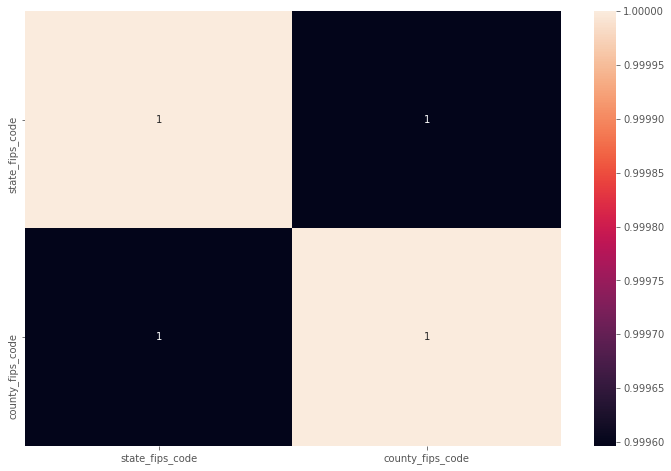

In [45]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

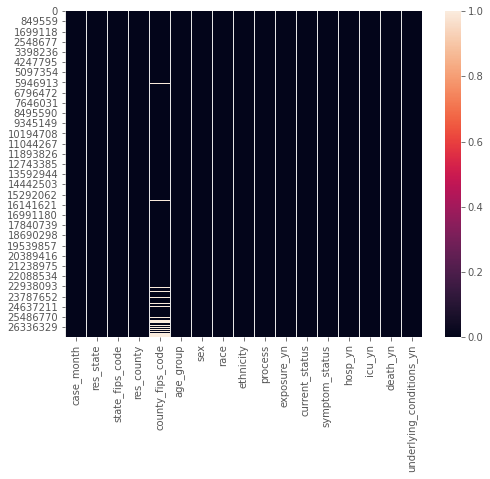

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna())
plt.show()

### Total cases each month in millions 

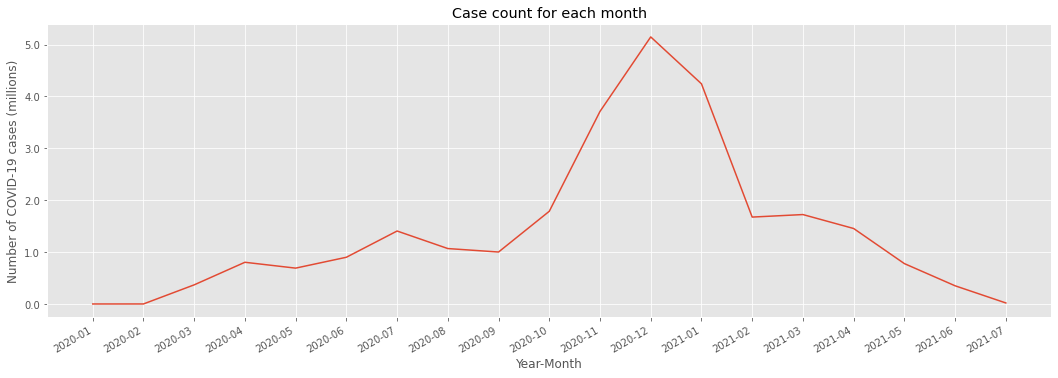

In [144]:
# Total cases each month in millions
dfs = df.groupby("case_month")["case_month"].count()
fig , ax = plt.subplots(figsize=(18,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases (millions)")
plt.plot(dfs.index, dfs.values)
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
fig.autofmt_xdate()
plt.show()



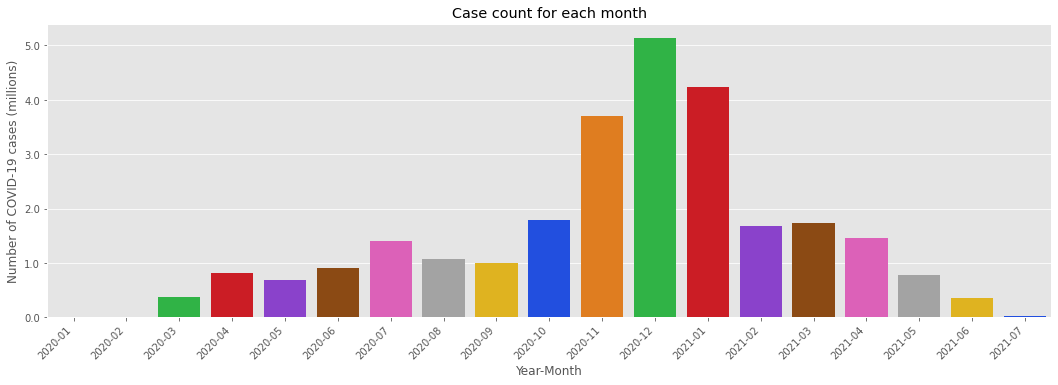

In [270]:
# Total cases each month in millions
dts = list(np.sort(df['case_month'].unique()))
fig , ax = plt.subplots(figsize=(18,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
custom_palette = sns.color_palette("bright", 9)
sns.countplot(df['case_month'], order = dts,palette=custom_palette);
fig.autofmt_xdate()
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases (millions)")
plt.xticks(rotation=45);
plt.show()

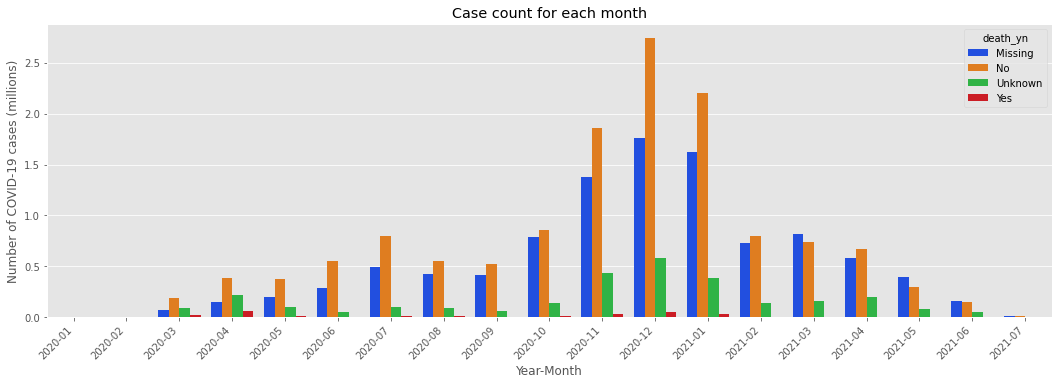

In [275]:
# Total cases each month in millions
dts = list(np.sort(df['case_month'].unique()))
fig , ax = plt.subplots(figsize=(18,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['case_month'], order = dts, hue = df['death_yn']);
fig.autofmt_xdate()
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases (millions)")
plt.legend(title='death_yn', loc="upper right")
plt.xticks(rotation=45);
plt.show()

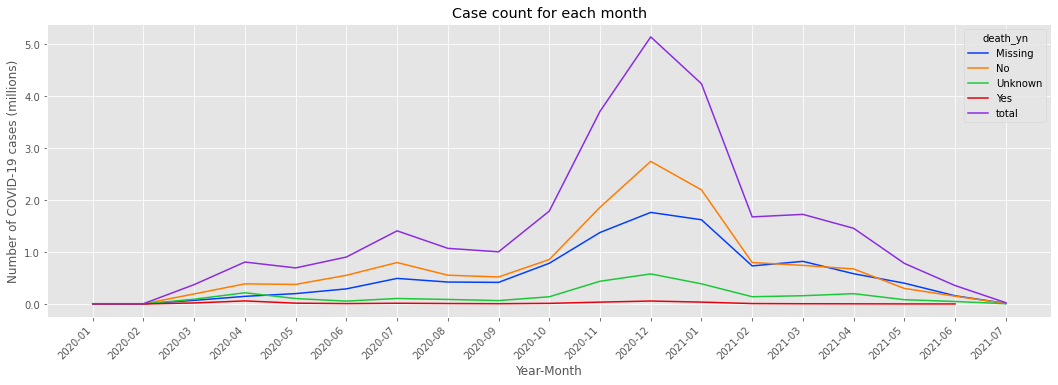

In [276]:
# Total cases each month in millions stacked and sorted by Year-Month ascending
# total column can be removed to exclude
dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='case_month',ascending=True,inplace=True)
dts = list(np.sort(df['case_month'].unique()))
fig , ax = plt.subplots(figsize=(18,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.plot(dfs.index, dfs)
fig.autofmt_xdate()
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases (millions)")
ax.legend(dfs.columns,title='death_yn')
plt.xticks(rotation=45);
plt.show()


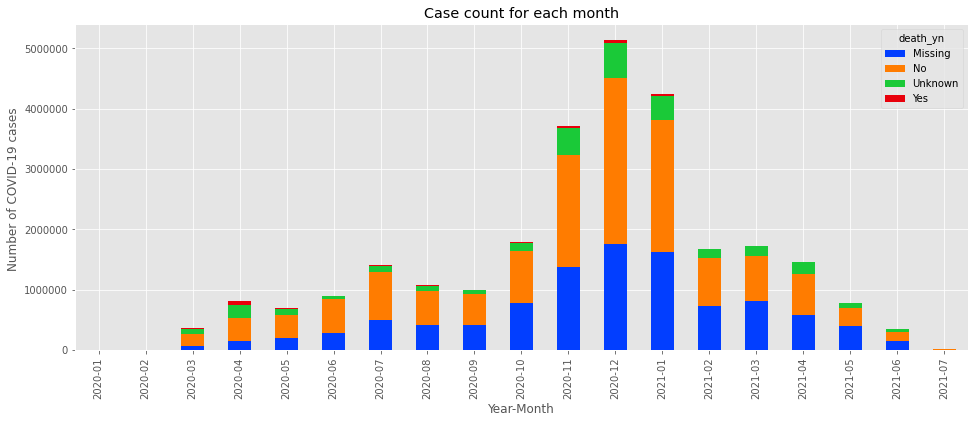

In [306]:
# Total cases each month in millions stacked and sorted by Year-Month ascending
# can not avoid scientific notation , can not apply custom formatter on y axis in millions with matplotlib or pandas plot

dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='case_month',ascending=True,inplace=True)
dfs[cols].plot(kind='bar',stacked=True,figsize=(16,6))
plt.ticklabel_format(axis="y",style='plain')  # avoid scientific notation , can not apply custom formatter on y axis with matplotlib
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases ")
plt.show()

Text(0, 0.5, 'Number of COVID-19 cases (millions)')

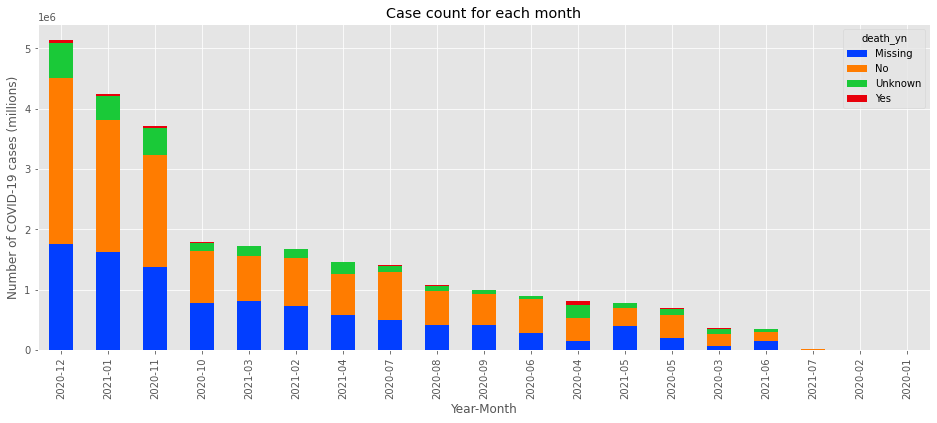

In [307]:
# Total cases each month in millions stacked and sorted by total  cases descending
# can not avoid scientific notation , can not apply custom formatter on y axis in millions with matplotlib or pandas plot

dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='total',ascending=False,inplace=True)
dfs[cols].plot(kind='bar',stacked=True,figsize=(16,6))
plt.title("Case count for each month")
plt.xlabel("Year-Month")
plt.ylabel("Number of COVID-19 cases (millions)")


In [246]:
# dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
# cols=dfs.columns
# dfs['total']=dfs.sum(axis=1)
# dfs.sort_values(by='case_month',ascending=True,inplace=True)
# labels = dts
# width = 0.35       
# fig , ax = plt.subplots(figsize=(18,6));
# ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# ax.bar(labels, dfs['total'], width,  label='total')
# ax.bar(labels, dfs['Missing'], width,  label='Missing')
# ax.bar(labels, dfs['No'], width,  label='No')
# ax.bar(labels, dfs['Unknown'], width,  label='Unknown')
# ax.bar(labels, dfs['Yes'], width,  label='Yes')
# ax.set_ylabel('Number of COVID-19 cases (millions)')
# ax.set_xlabel('Year-Month')
# ax.set_title('Case count for each month')

# plt.legend(title='death_yn', loc="upper right")
# plt.show()

### Death Percentage each month in millions 

Text(0, 0.5, 'Death Percentage')

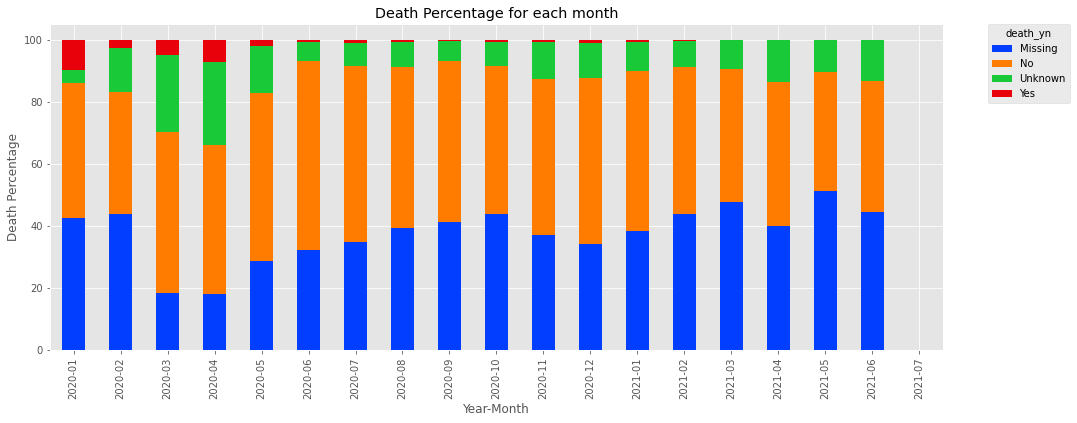

In [287]:
# Total cases each month in millions stacked and sorted by Year-Month ascending

dfs = df.groupby(['case_month','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='case_month',ascending=True,inplace=True)
dfs.drop('total',axis=1,inplace=True)
dfs.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True,figsize=(16,6))
plt.legend(title='death_yn',bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.title("Death Percentage for each month")
plt.xlabel("Year-Month")
plt.ylabel("Death Percentage")

In [225]:
# x, y, hue = "case_month", "Percentage", "death_yn"

# fig = plt.figure(figsize=(15,6));
# (df[x]
#  .groupby(df[hue])
#  .value_counts(normalize=True)
#  .rename(y)
#  .reset_index()
#  .pipe((sns.barplot,"data"), x=x, y=y, hue=hue))
# fig.autofmt_xdate()
# plt.xticks(rotation=45);
# plt.title("Death Percentage for each month")
# plt.xlabel("Year-Month")
# plt.ylabel("Death Percentage ")


### Count summary for number of cases by state

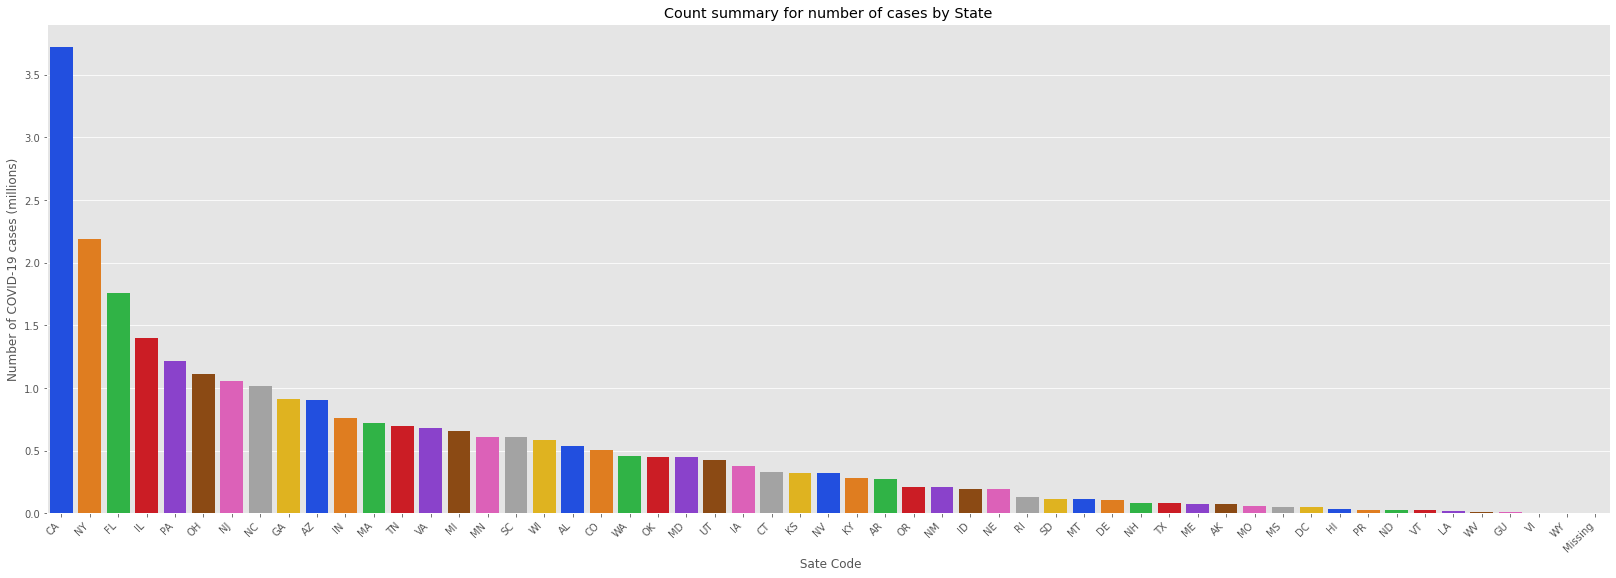

In [289]:
# Total cases each state in millions stacked

fig , ax = plt.subplots(figsize=(28,10));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
custom_palette = sns.color_palette("bright", 9)
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index,palette=custom_palette);
fig.autofmt_xdate()
plt.title("Count summary for number of cases by State")
plt.xlabel(" Sate Code")
plt.ylabel("Number of COVID-19 cases (millions)")
plt.xticks(rotation=45);
plt.show()

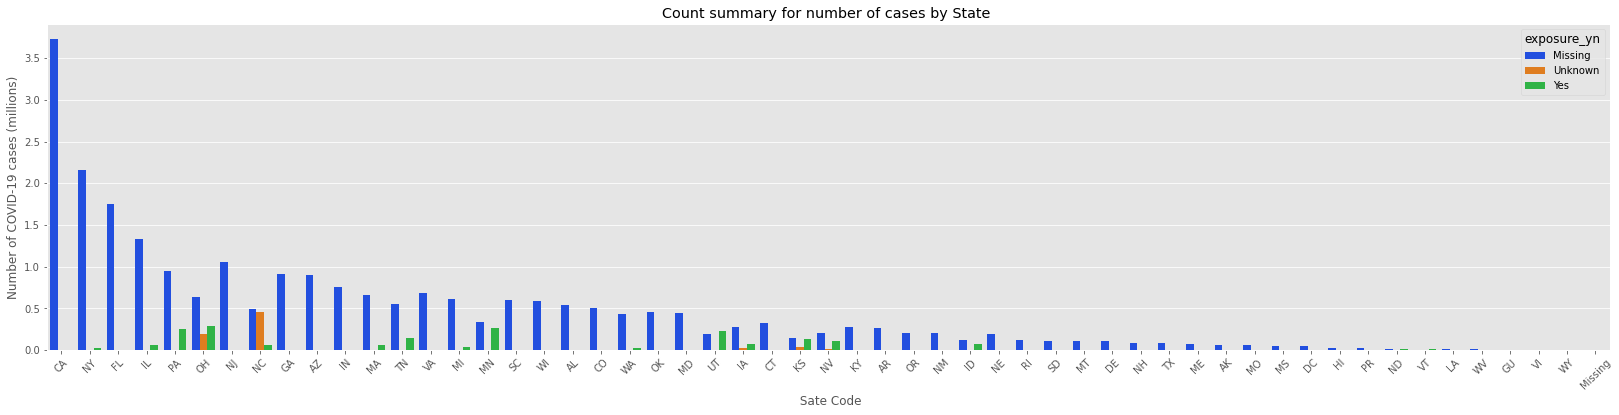

In [293]:
# Total cases  in each state in millions stacked over exposure

fig , ax = plt.subplots(figsize=(28,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index,  hue = df['exposure_yn']);
plt.xticks(rotation=45);
plt.title("Count summary for number of cases by State ")
plt.xlabel(" Sate Code")
plt.ylabel("Number of COVID-19 cases (millions)")
plt.show()

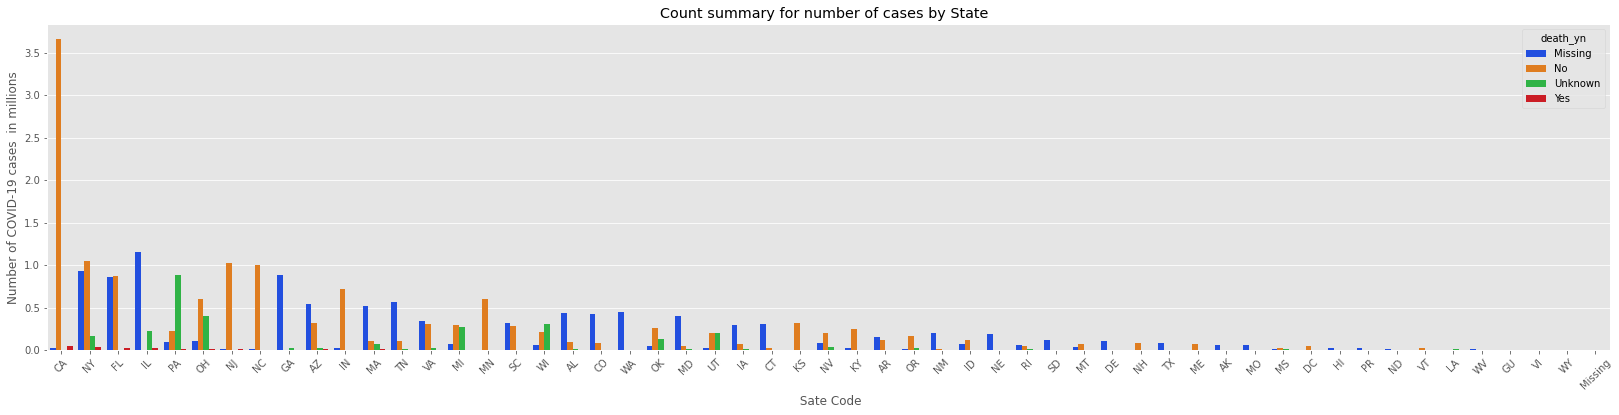

In [294]:
# Total  death each state in millions stacked  over death

fig , ax = plt.subplots(figsize=(28,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(x='res_state', data=df, order = df['res_state'].value_counts().index,  hue = df['death_yn']);
plt.title("Count summary for number of cases by State  ")
plt.xlabel(" Sate Code")
plt.ylabel("Number of COVID-19 cases  in millions")
plt.legend(title='death_yn',loc="upper right")
plt.xticks(rotation=45);
plt.show()

### Count summary for number cases by Ethnicity

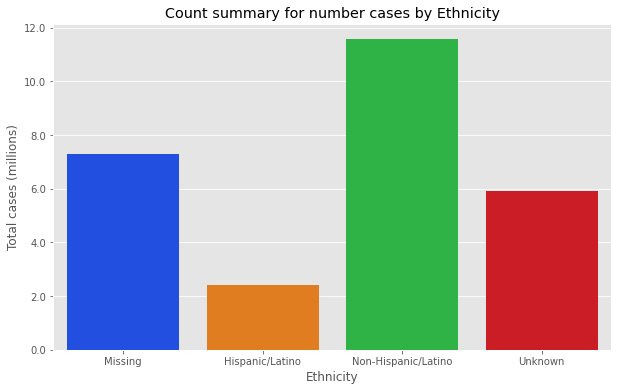

In [290]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['ethnicity'])
plt.title("Count summary for number cases by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Total cases (millions)")
plt.show()

### Count summary for number cases by Race

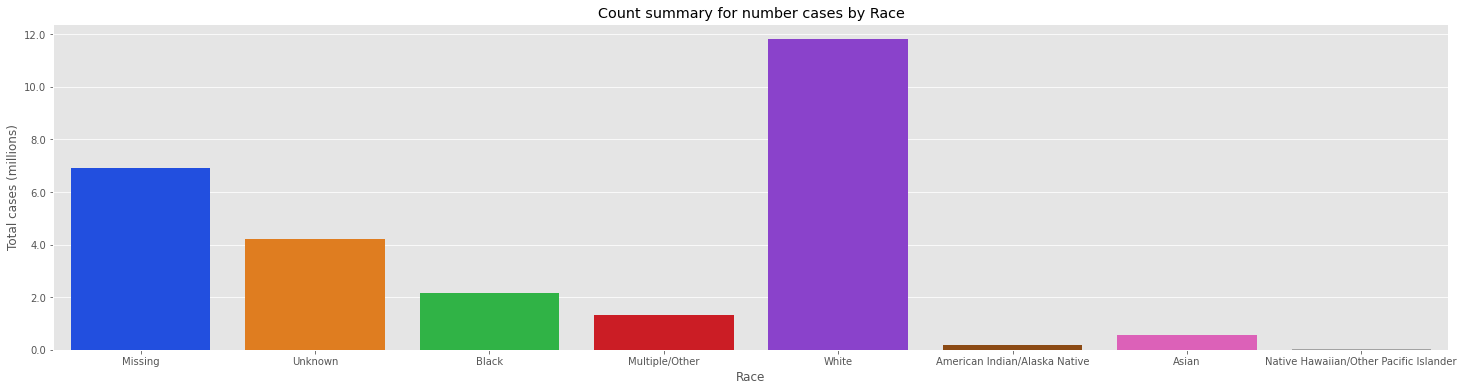

In [291]:
fig , ax = plt.subplots(figsize=(25,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['race'])
plt.title("Count summary for number cases by Race")
plt.xlabel("Race")
plt.ylabel("Total cases (millions)")
plt.show()

### Count summary for number cases by Age Group

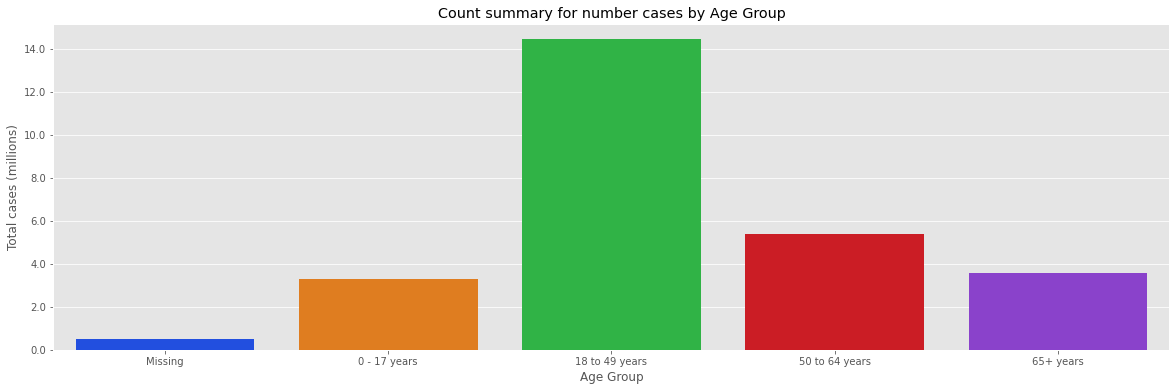

In [292]:
fig , ax = plt.subplots(figsize=(20,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['age_group'])
plt.title("Count summary for number cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total cases (millions)")
plt.show()

### Death vs Undelying Condition

Text(0, 0.5, 'Death Percentage')

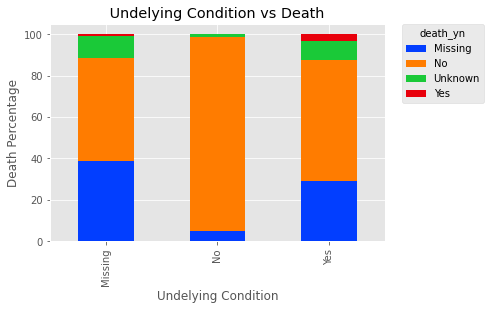

In [299]:
# Death Percentage - Death vs Undelying Condition
dfs = df.groupby(['underlying_conditions_yn','death_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='underlying_conditions_yn',ascending=True,inplace=True)
dfs.drop('total',axis=1,inplace=True)
dfs.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.legend(title='death_yn', bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.title(" Undelying Condition vs Death ")
plt.xlabel("Undelying Condition")
plt.ylabel("Death Percentage")

Text(0, 0.5, 'Death Percentage')

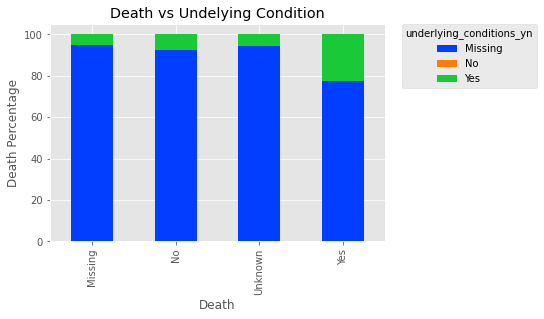

In [295]:
# Death Percentage - Death vs Undelying Condition
dfs = df.groupby(['death_yn','underlying_conditions_yn']).count()['res_state'].unstack()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='death_yn',ascending=True,inplace=True)
dfs.drop('total',axis=1,inplace=True)
dfs.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.legend(title='underlying_conditions_yn',bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.title("Death vs Undelying Condition")
plt.xlabel("Death")
plt.ylabel("Death Percentage")

underlying_conditions_yn,Missing,No,Yes
death_yn,,,
Missing,94.98,0.01,5.01
No,92.30,0.21,7.50
Unknown,94.38,0.01,5.61
Yes,77.39,0.00,22.61


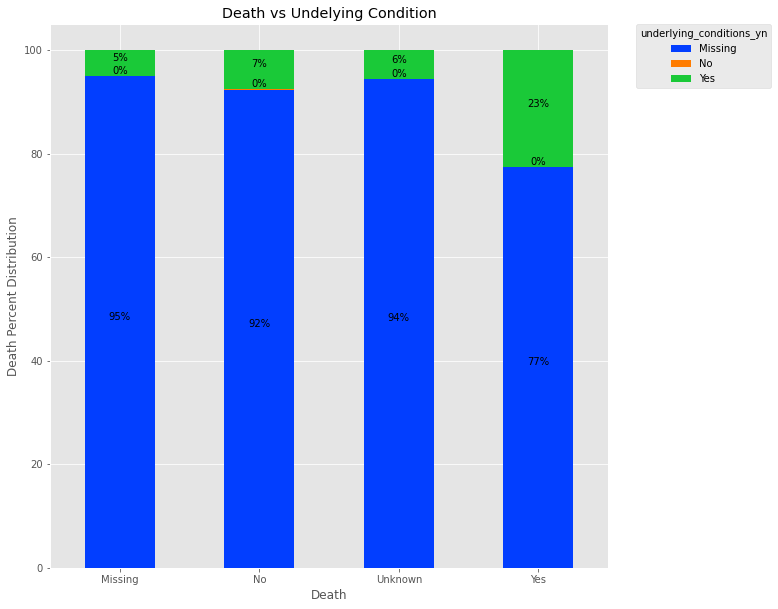

In [296]:
ax= pd.crosstab(df['death_yn'], df['underlying_conditions_yn']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.legend(title='underlying_conditions_yn',bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.xlabel('Death')
plt.ylabel('Death Percent Distribution')
plt.title("Death vs Undelying Condition")

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

Text(0, 0.5, 'Death Percentage')

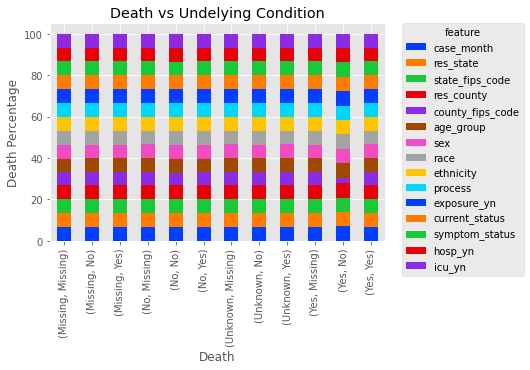

In [300]:
# Death Percentage - Death vs Undelying Condition
dfs = df.groupby(['death_yn','underlying_conditions_yn']).count()
cols=dfs.columns
dfs['total']=dfs.sum(axis=1)
dfs.sort_values(by='death_yn',ascending=True,inplace=True)
dfs.drop('total',axis=1,inplace=True)
dfs.apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
plt.legend(title='feature', bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.title("Death vs Undelying Condition")
plt.xlabel("Death")
plt.ylabel("Death Percentage")

### Other

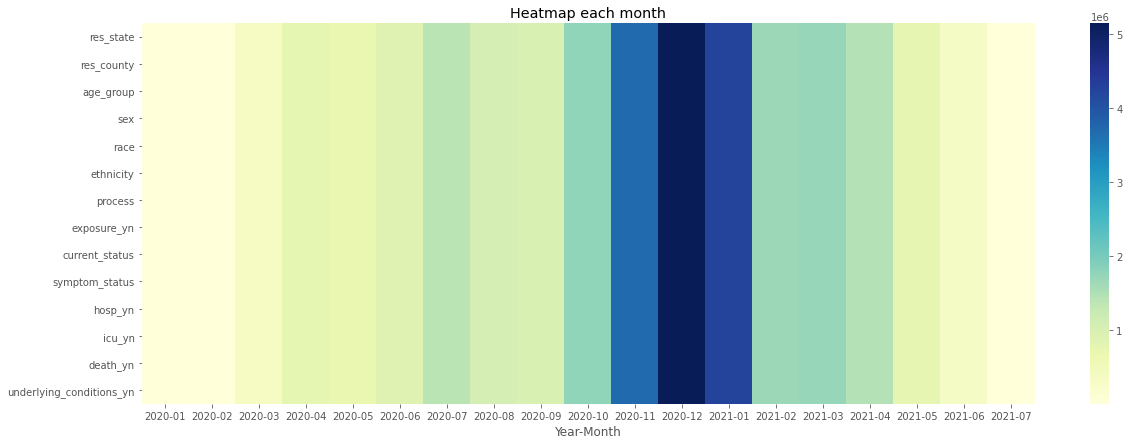

In [226]:
df_m = df.groupby('case_month').count()
#df_m.head()
df_m = df_m.drop(columns = ['state_fips_code','county_fips_code']).T
df_m.head()

plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(df_m, cmap='YlGnBu')  #heat map to plot the above table
plt.title("Heatmap each month")
plt.xlabel("Year-Month")
plt.show()

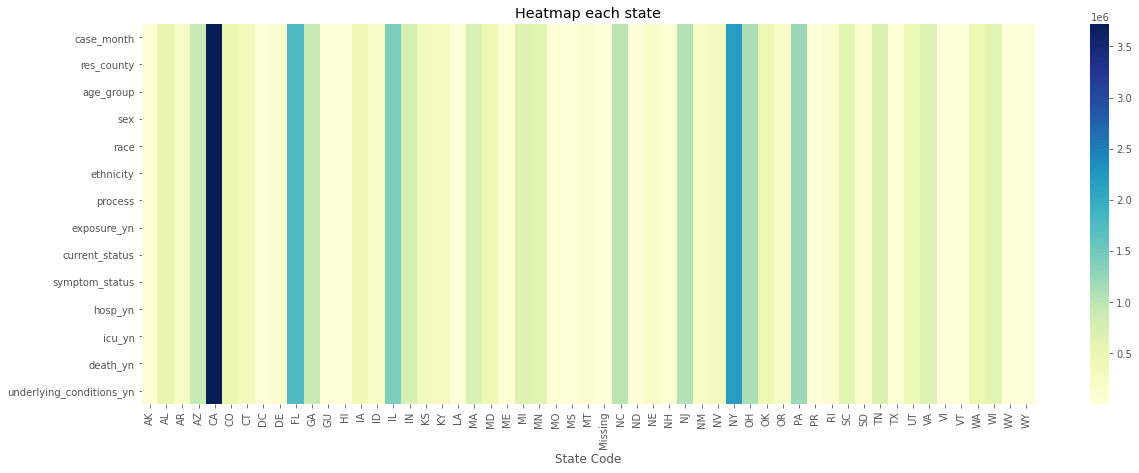

In [227]:
df_m = df.groupby('res_state').count()
df_m = df_m.drop(columns = ['state_fips_code','county_fips_code']).T
df_m.head()

plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(df_m, cmap='YlGnBu')  #heat map to plot the above table
plt.title("Heatmap each state")
plt.xlabel("State Code")
plt.show()

### Univariate plots

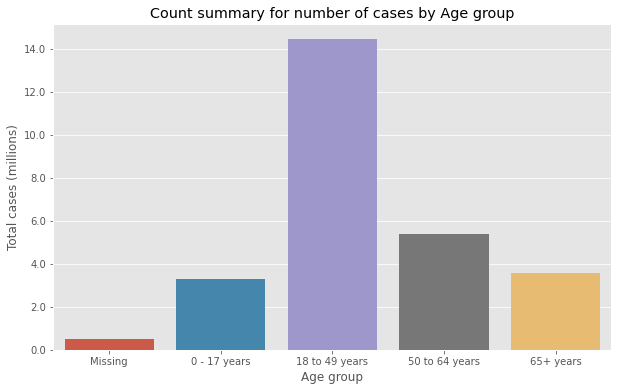

In [231]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['age_group'])
plt.title("Count summary for number of cases by Age group")
plt.xlabel("Age group")
plt.ylabel("Total cases (millions)")
plt.show()

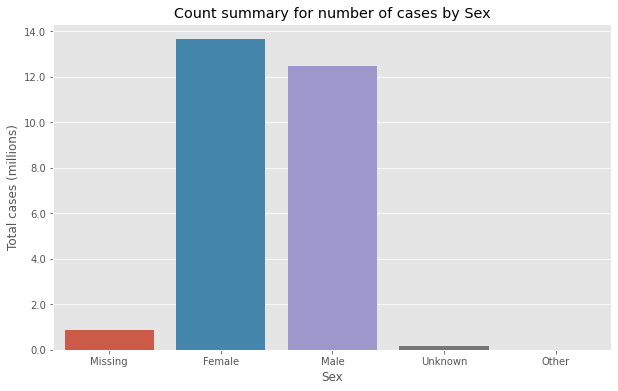

In [232]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['sex'])
plt.title("Count summary for number of cases by Sex")
plt.xlabel("Sex")
plt.ylabel("Total cases (millions)")
plt.show()

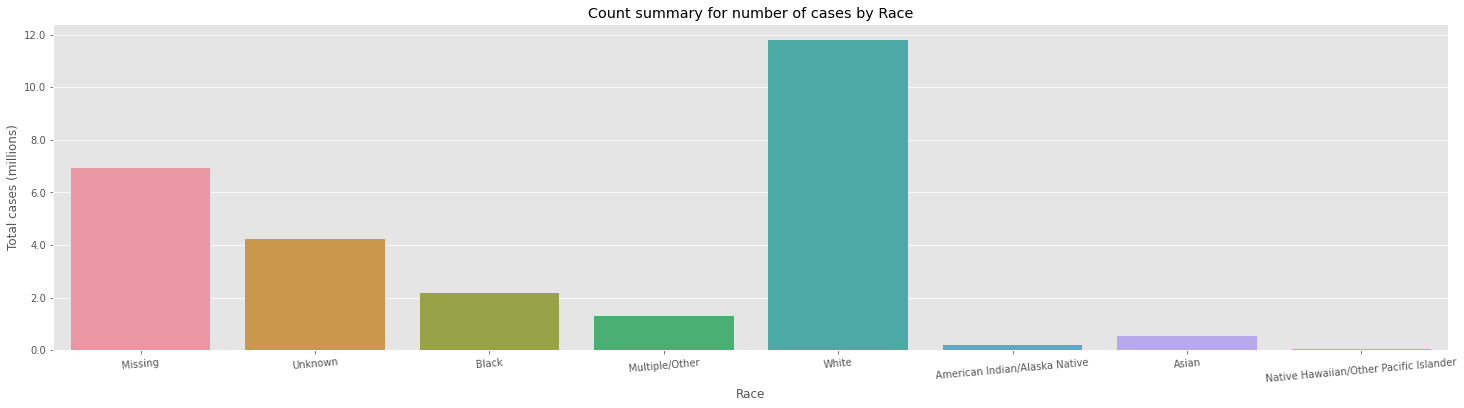

In [233]:
fig , ax = plt.subplots(figsize=(25,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['race'])
plt.title("Count summary for number of cases by Race")
plt.xlabel("Race")
plt.ylabel("Total cases (millions)")
plt.xticks(rotation=5)
plt.show()

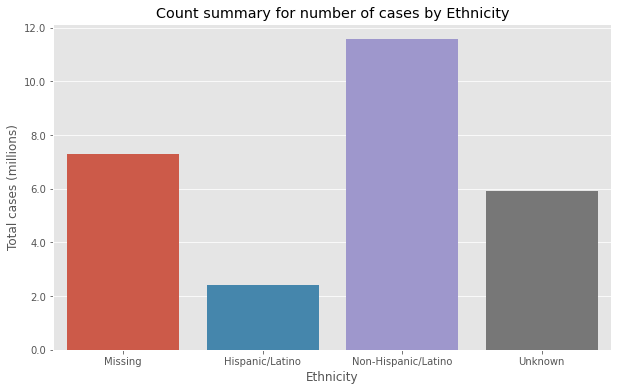

In [234]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['ethnicity'])
plt.title("Count summary for number of cases by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Total cases (millions)")
plt.show()

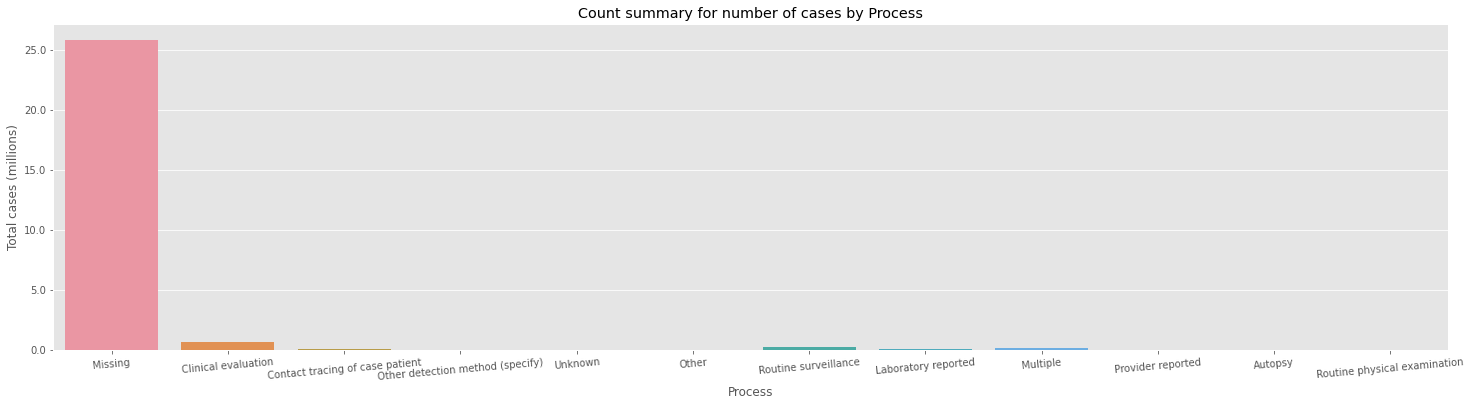

In [235]:
fig , ax = plt.subplots(figsize=(25,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['process'])
plt.title("Count summary for number of cases by Process")
plt.xlabel("Process")
plt.ylabel("Total cases (millions)")
plt.xticks(rotation=5)
plt.show()

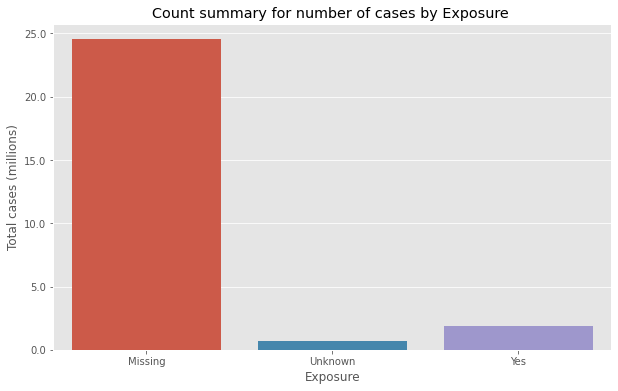

In [237]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['exposure_yn'])
plt.title("Count summary for number of cases by Exposure ")
plt.xlabel("Exposure")
plt.ylabel("Total cases (millions)")
plt.show()

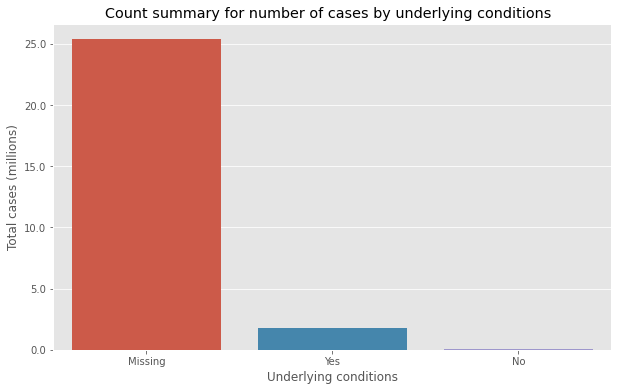

In [243]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['underlying_conditions_yn'])
plt.title("Count summary for number of cases by underlying conditions  ")
plt.xlabel("Underlying conditions")
plt.ylabel("Total cases (millions)")
plt.show()

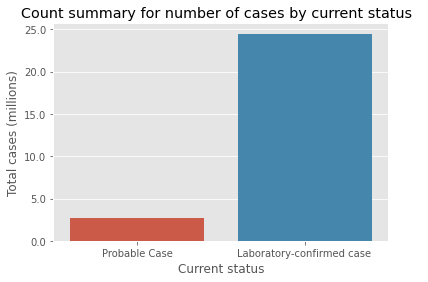

In [242]:
fig , ax = plt.subplots();
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['current_status'])
plt.title("Count summary for number of cases by current status  ")
plt.xlabel("Current status")
plt.ylabel("Total cases (millions)")
plt.show()

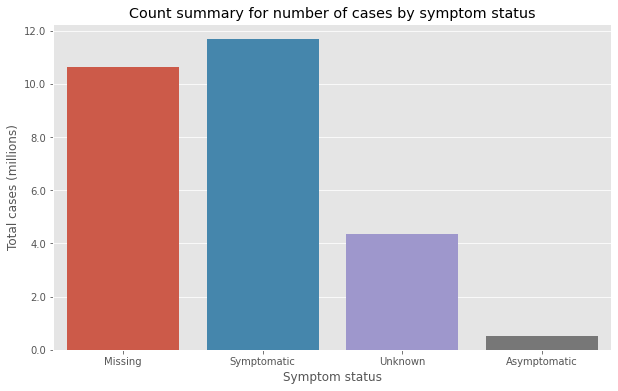

In [245]:
fig , ax = plt.subplots(figsize=(10,6));
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.countplot(df['symptom_status'])
plt.title("Count summary for number of cases by symptom status")
plt.xlabel("Symptom status")
plt.ylabel("Total cases (millions)")
plt.show()